# Feature Engineering:- Handling Outliers

Discussion Related With Outliers And Impact On Machine Learning!

Which Machine LEarning Models Are Sensitive To Outliers?

1- Naivye Bayes Classifier--- Not Sensitive To Outliers

2- SVM-------- Not Sensitive To Outliers

3- Decision Tree Regressor or Classifier---- Not Sensitive

4- Ensemble(RF,XGboost,GB)------- Not Sensitive

5- KNN--------------------------- Not Sensitive

**** Sensitive to Outliers

1- Linear Regression---------- Sensitive

2- Logistic Regression------- Sensitive

3- Kmeans------------------------ Sensitive

4- Hierarichal Clustering------------------- Sensitive

5- PCA-------------------------- Sensitive

6- Neural Networks-------------- Sensitive


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [9]:
df =pd.read_csv("https://gist.githubusercontent.com/michhar/2dfd2de0d4f8727f873422c5d959fff5/raw/ff414a1bcfcba32481e4d4e8db578e55872a2ca1/titanic.csv",
                           sep='\t')

In [11]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [13]:
df['Age'].isnull().sum()

30

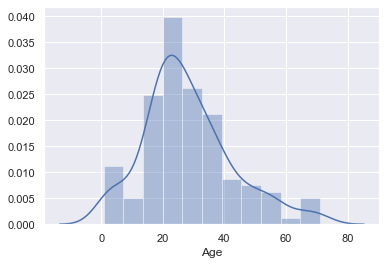

In [14]:
sns.distplot(df['Age'].dropna())

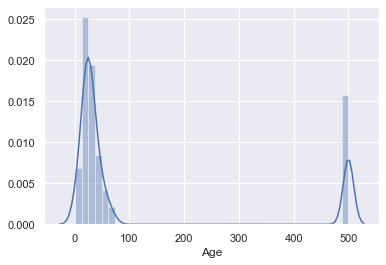

In [17]:
#How the null values are located on the graph
sns.distplot(df['Age'].fillna(500))

In [24]:
# THis is Gaussian Distribution

Text(0, 0.5, 'No of Passengers')

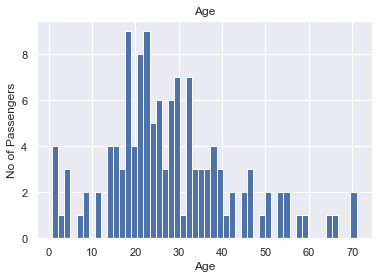

In [25]:
figure = df.Age.hist(bins = 50)
figure.set_title('Age')
figure.set_xlabel('Age')
figure.set_ylabel('No of Passengers')

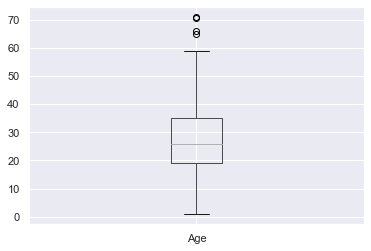

In [26]:
figure=df.boxplot(column="Age")

In [29]:
df['Age'].describe()

count    126.000000
mean      28.141508
std       14.613880
min        0.830000
25%       19.000000
50%       26.000000
75%       35.000000
max       71.000000
Name: Age, dtype: float64

In [33]:
######### Assuming Age follows a gaussian distribution. We will calculate the boundaries which differentiates the outliers.

upper_boundary = df['Age'].mean() + 3*df['Age'].std()
upper_boundary

71.98314771619032

In [35]:
lower_boundary = df['Age'].mean() - 3*df['Age'].std()
lower_boundary

-15.700131843174447

In [37]:
### Lets calculate the interquantile range to calculate the boundaries
IQR =df.Age.quantile(0.75)-df.Age.quantile(0.25)
IQR

16.0

In [40]:
lower_bridge = df['Age'].quantile(0.25)-(IQR *1.5)
lower_bridge

-5.0

In [41]:
upper_bridge = df['Age'].quantile(0.25)+(IQR *1.5)
upper_bridge

43.0

In [42]:
### Extreme Outliers
lower_bridge = df['Age'].quantile(0.25)-(IQR * 3)
print(lower_bridge)
upper_bridge = df['Age'].quantile(0.25)+(IQR * 3)
print(upper_bridge)

-29.0
67.0


In [43]:
## We can conclude that after 67.0 everything that is above 67.0 is an outlier for us.

# What to do if feature is skewed.

Text(0, 0.5, 'No of Passengers')

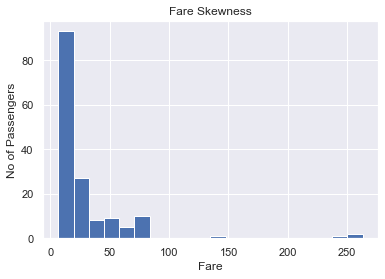

In [45]:
figure = df.Fare.hist(bins = 20)
figure.set_title('Fare Skewness')
figure.set_xlabel('Fare')
figure.set_ylabel('No of Passengers')

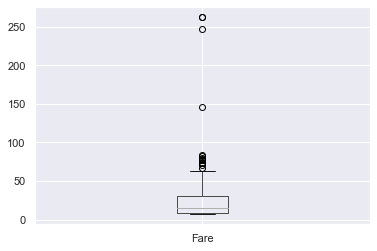

In [46]:
figure =df.boxplot(column = 'Fare')

In [49]:
df['Fare'].describe()

count    156.000000
mean      28.109587
std       39.401047
min        6.750000
25%        8.003150
50%       14.454200
75%       30.371850
max      263.000000
Name: Fare, dtype: float64

In [64]:
#### Lets compute the Interquantile range to calculate the boundaries
IQR=df.Fare.quantile(0.75)-df.Fare.quantile(0.25)

In [65]:
# COmpute the lower brige and the upper bridge
lower_bridge=df['Fare'].quantile(0.25)-(IQR*1.5)
upper_bridge=df['Fare'].quantile(0.75)+(IQR*1.5)
print(lower_bridge), print(upper_bridge)

-25.549900000000008
63.92490000000001


(None, None)

In [66]:
#### Extreme outliers
lower_bridge=df['Fare'].quantile(0.25)-(IQR*3)
upper_bridge=df['Fare'].quantile(0.75)+(IQR*3)
print(lower_bridge), print(upper_bridge)

-59.102950000000014
97.47795000000002


(None, None)

In [67]:
data =df.copy()
data.loc[data['Age']>73,'Age'] = 73

In [68]:
data.loc[data['Fare']>=100,'Fare'] = 100

# Apply Machine Learning Algorithm

In [70]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(data[['Age','Fare']].fillna(0),data['Survived'],test_size = 0.3)

In [76]:
## Logistic Regression
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(x_train,y_train)
y_pred = classifier.predict(x_test)
y_pred1 = classifier.predict_proba(x_test)

In [80]:
from sklearn.metrics import accuracy_score,roc_auc_score
print("Accuracy_score: {}".format(accuracy_score(y_test,y_pred)))
print("roc_auc_score: {}".format(roc_auc_score(y_test,y_pred1[:,1])))

Accuracy_score: 0.7872340425531915
roc_auc_score: 0.5409356725146199


In [81]:
## RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(x_train,y_train)
y_pred = classifier.predict(x_test)
y_pred1 = classifier.predict_proba(x_test)
from sklearn.metrics import accuracy_score,roc_auc_score
print("Accuracy_score: {}".format(accuracy_score(y_test,y_pred)))
print("roc_auc_score: {}".format(roc_auc_score(y_test,y_pred1[:,1])))

Accuracy_score: 0.723404255319149
roc_auc_score: 0.6403508771929824
